In [1]:
import pandas as pd
import torch
import numpy as np
from autoembedder import Autoembedder, dataloader, fit

train_df = pd.read_csv('output_train_final.csv')
valid_df = pd.read_csv('output_test_final.csv')

torch.set_default_dtype(torch.float64)
cat_columns = [x for x in list(set(train_df.columns) - {'Amount'})]

for col in cat_columns:
    valid_df[col] = valid_df[col].astype('category')

In [4]:
parameters = {
    "hidden_layers": [[25, 20], [20, 10]],
    "epochs": 10,
    "lr": 0.0001,
    "verbose": 1,
    "batch_size": 16,
}


train_dl = dataloader(train_df, parameters)
valid_dl = dataloader(valid_df, parameters)

list_cat = [(134, 127)]

print(f'Num of features {train_df.shape[1]}')
model = Autoembedder(parameters, num_cont_features=1, embedding_sizes=list_cat)

fit(parameters, model, train_dl, valid_dl)

Num of features 134
Set model config: {'hidden_layers': [[25, 20], [20, 10]], 'epochs': 10, 'lr': 0.0001, 'verbose': 1, 'batch_size': 16}
Model `in_features`: 128


[1/28]   4%|3          [00:00<?]

Epoch [1/10]: validation loss: 0.9301772


[1/28]   4%|3          [00:00<?]

Epoch [2/10]: validation loss: 0.8964528


[1/28]   4%|3          [00:00<?]

Epoch [3/10]: validation loss: 0.8567294


[1/28]   4%|3          [00:00<?]

Epoch [4/10]: validation loss: 0.8108294


[1/28]   4%|3          [00:00<?]

Epoch [5/10]: validation loss: 0.7587883


[1/28]   4%|3          [00:00<?]

Epoch [6/10]: validation loss: 0.7013601


[1/28]   4%|3          [00:00<?]

Epoch [7/10]: validation loss: 0.6404184


[1/28]   4%|3          [00:00<?]

Epoch [8/10]: validation loss: 0.5785798


[1/28]   4%|3          [00:00<?]

Epoch [9/10]: validation loss: 0.5184390


[1/28]   4%|3          [00:00<?]

Epoch [10/10]: validation loss: 0.4621279


Autoembedder(
  (embeddings): ModuleList(
    (0): Embedding(134, 127)
  )
  (encoder): Sequential(
    (0): Linear(in_features=128, out_features=25, bias=True)
    (1): Linear(in_features=25, out_features=20, bias=True)
    (2): Linear(in_features=20, out_features=10, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=10, out_features=20, bias=True)
    (1): Linear(in_features=20, out_features=25, bias=True)
    (2): Linear(in_features=25, out_features=128, bias=True)
  )
)

In [5]:
torch.save(model.state_dict(), 'encoder.pth')

In [6]:
model.eval()

Autoembedder(
  (embeddings): ModuleList(
    (0): Embedding(134, 127)
  )
  (encoder): Sequential(
    (0): Linear(in_features=128, out_features=25, bias=True)
    (1): Linear(in_features=25, out_features=20, bias=True)
    (2): Linear(in_features=20, out_features=10, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=10, out_features=20, bias=True)
    (1): Linear(in_features=20, out_features=25, bias=True)
    (2): Linear(in_features=25, out_features=128, bias=True)
  )
)

In [146]:
result = {}
result_dataframe = pd.DataFrame()
a1 = torch.Tensor(train_df[:2]['Amount'].values).view(1, -1)
a2 = torch.Tensor(train_df[:2].drop('Amount', axis=1).values).T
print(a1.shape, a2.shape)
# x_emb = torch.cat([torch.Tensor(train_df.iloc[:2].values[0]).unsqueeze(0), torch.Tensor(train_df.iloc[:2].values[1::]).view(-1, 1)])
# print(x_emb)
model(x_cont=torch.Tensor(train_df['Amount'].values).view(1, -1), x_cat=torch.Tensor(train_df.drop('Amount', axis=1).values).T)
print(model.code_value)
result_dataframe = result_dataframe.append(pd.DataFrame(model.code_value.detach().numpy()))

torch.Size([1, 2]) torch.Size([133, 2])
tensor([[-0.5834,  0.1895,  0.3949,  ..., -0.8416, -0.8158, -0.9339],
        [-0.5831,  0.1894,  0.3957,  ..., -0.8415, -0.8155, -0.9339],
        [-0.5839,  0.1897,  0.3934,  ..., -0.8417, -0.8160, -0.9339],
        ...,
        [-0.5839,  0.1897,  0.3934,  ..., -0.8417, -0.8160, -0.9339],
        [-0.5838,  0.1897,  0.3938,  ..., -0.8417, -0.8159, -0.9339],
        [-0.5838,  0.1897,  0.3936,  ..., -0.8417, -0.8160, -0.9339]])


C:\Users\Marko\AppData\Local\Temp\ipykernel_19164\1326792614.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_dataframe = result_dataframe.append(pd.DataFrame(model.code_value.detach().numpy()))


In [152]:
result = {}
test_dataframe = pd.DataFrame()
a1 = torch.Tensor(train_df[:2]['Amount'].values).view(1, -1)
a2 = torch.Tensor(train_df[:2].drop('Amount', axis=1).values).T
print(a1.shape, a2.shape)
# x_emb = torch.cat([torch.Tensor(train_df.iloc[:2].values[0]).unsqueeze(0), torch.Tensor(train_df.iloc[:2].values[1::]).view(-1, 1)])
# print(x_emb)
model(x_cont=torch.Tensor(valid_df['Amount'].values).view(1, -1), x_cat=torch.Tensor(valid_df.drop('Amount', axis=1).values).T)
print(model.code_value)
test_dataframe = test_dataframe.append(pd.DataFrame(model.code_value.detach().numpy()))

torch.Size([1, 2]) torch.Size([133, 2])
tensor([[-0.5830,  0.1893,  0.3960,  ..., -0.8414, -0.8155, -0.9339],
        [-0.5839,  0.1897,  0.3933,  ..., -0.8417, -0.8160, -0.9339],
        [-0.5840,  0.1897,  0.3932,  ..., -0.8417, -0.8160, -0.9339],
        ...,
        [-0.5832,  0.1894,  0.3954,  ..., -0.8415, -0.8156, -0.9339],
        [-0.5840,  0.1898,  0.3931,  ..., -0.8417, -0.8160, -0.9339],
        [-0.5829,  0.1893,  0.3962,  ..., -0.8414, -0.8154, -0.9338]])


C:\Users\Marko\AppData\Local\Temp\ipykernel_19164\560381377.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_dataframe = test_dataframe.append(pd.DataFrame(model.code_value.detach().numpy()))


In [153]:
test_dataframe

,0,1,2,3,4,5,6,7,8,9
0,-0.582979,0.189334,0.395955,0.610701,0.670229,0.966952,-0.843092,-0.841430,-0.815476,-0.933859
1,-0.583910,0.189727,0.393315,0.609252,0.668994,0.966940,-0.843969,-0.841682,-0.815998,-0.933933
2,-0.583955,0.189746,0.393154,0.609143,0.668890,0.966933,-0.844004,-0.841682,-0.816015,-0.933929
3,-0.580105,0.188378,0.400719,0.610940,0.668796,0.966307,-0.839361,-0.839074,-0.812728,-0.932738
4,-0.583449,0.189528,0.394758,0.610129,0.669793,0.966970,-0.843567,-0.841610,-0.815778,-0.933928
...,...,...,...,...,...,...,...,...,...,...
110,-0.583468,0.189536,0.394705,0.610100,0.669768,0.966970,-0.843585,-0.841616,-0.815789,-0.933929
111,-0.582679,0.189216,0.396619,0.610945,0.670360,0.966921,-0.842761,-0.841272,-0.815252,-0.933791
112,-0.583190,0.189420,0.395445,0.610477,0.670072,0.966965,-0.843312,-0.841522,-0.815619,-0.933897
113,-0.583968,0.189752,0.393109,0.609113,0.668860,0.966932,-0.844014,-0.841682,-0.816019,-0.933928


In [150]:
import hdbscan
from joblib import dump, load
clusterer = hdbscan.HDBSCAN(prediction_data=True).fit(result_dataframe)
dump(clusterer, 'anomaly_detection.model')

['anomaly_detection.model']

<AxesSubplot: ylabel='$\\lambda$ value'>

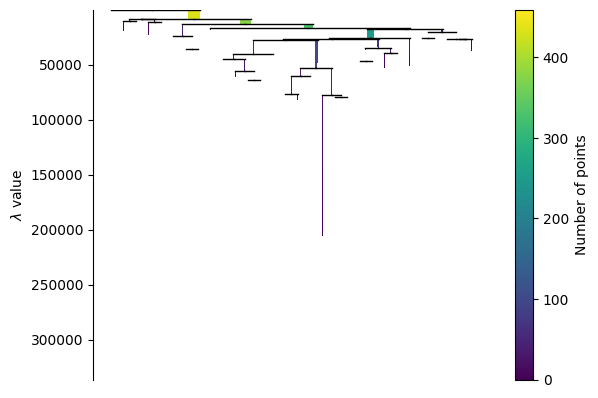

In [151]:
clusterer.condensed_tree_.plot()